In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.metrics import cohen_kappa_score

# Load the two CSV files annotated by two different people
hetavLabeled = pd.read_csv('2700_comments_hetav_labeled.csv')
anishaLabeled = pd.read_csv('2700_comments_anisha_labeled.csv')

# Assuming both CSVs have a column 'label' with the annotations

In [42]:
# # check if the two files with the name '2700_comments_hetav_labeled.csv' and '2700_comments_final_hetav_labeled.csv' are identical
# # annotations_final = pd.read_csv('2700_comments_final_hetav_labeled.csv')
# are_identical = annotations1.equals(annotations2)
# print(f"Are the two files identical? {are_identical}")

# # display how many rows are different between the two files for the same id, the llm_output column has different values


# import pandas as pd

# # Load the two CSV files
# file1 = "2700_comments_hetav_labeled.csv"
# file2 = "2700_comments_anisha_labeled.csv"

# df1 = pd.read_csv(file1)
# df2 = pd.read_csv(file2)

# # Ensure both DataFrames are sorted by 'serial_number' for comparison
# df1 = df1.sort_values(by="Serial_Number").reset_index(drop=True)
# df2 = df2.sort_values(by="Serial_Number").reset_index(drop=True)

# df1["llm_output"] = df1["llm_output"].astype(int)
# df2["llm_output"] = df2["llm_output"].astype(int)

# # Rename columns in the second DataFrame to distinguish them
# df2 = df2.rename(columns={"llm_output": "llm_output_done_by_anisha"})
# df1 = df1.rename(columns={"llm_output": "llm_output_done_by_hetav"})

# # Merge the two DataFrames on 'serial_number' to align rows
# merged_df = pd.merge(df1, df2, on="Serial_Number", suffixes=('_file1', ''))

# merged_df.head()  # Display the first few rows of the merged DataFrame


# differences = merged_df[merged_df["llm_output_done_by_hetav"] != merged_df["llm_output_done_by_anisha"]]

# # Compute the percentage of differences
# total_rows = len(merged_df)
# different_rows = len(differences)
# percentage_difference = (different_rows / total_rows) * 100

# print(f"Total rows compared: {total_rows}")
# print(f"Number of differing rows: {different_rows}")
# print(f"Percentage of differing rows: {percentage_difference:.2f}%")


# from sklearn.metrics import cohen_kappa_score

# kappa_score = cohen_kappa_score(merged_df["llm_output_done_by_hetav"], merged_df["llm_output_done_by_anisha"])
# print(f"Cohen's Kappa Score: {kappa_score:.2f}")

In [43]:
#give me distribution of the Label_Topic column in the two dataframes seperately
print("Distribution of Label_Topic in hetavLabeled:")
print(hetavLabeled['Label_Topic'].value_counts())
print("\nDistribution of Label_Topic in anishaLabeled:")
print(anishaLabeled['Label_Topic'].value_counts())

Distribution of Label_Topic in hetavLabeled:
Label_Topic
Irrelevant/General Comments                   1019
Anger or Outrage                               685
Views on Similar Cases in the Past             264
Socioeconomic Privilege                        258
Judicial Accountability and Policy Demands     229
Victim Sympathy                                157
Public Safety                                   95
Name: count, dtype: int64

Distribution of Label_Topic in anishaLabeled:
Label_Topic
Irrelevant/General Comments                   1101
Anger or Outrage                               724
Views on Similar Cases in the Past             254
Judicial Accountability and Policy Demands     224
Socioeconomic Privilege                        220
Victim Sympathy                                129
Public Safety                                   55
Name: count, dtype: int64


In [44]:
# I need to randomly sample 157 rows for each Label_Topic and just take all the 95 rows for the topic 'Public Safety' from the hetavLabeled dataframe
sampled_dfs = []
label_topics = hetavLabeled['Label_Topic'].unique()
for topic in label_topics:
    topic_df = hetavLabeled[hetavLabeled['Label_Topic'] == topic]
    if topic == 'Public Safety':
        sampled_dfs.append(topic_df)
    else:
        sampled_dfs.append(topic_df.sample(n=157, random_state=42))
sampled_hetav = pd.concat(sampled_dfs)
sampled_hetav = sampled_hetav.reset_index(drop=True)
print("\nDistribution of Label_Topic in sampled hetavLabeled:")
print(sampled_hetav['Label_Topic'].value_counts())
# Save the sampled dataframe to a new CSV file

sampled_hetav.to_csv('sampled_hetav_labeled.csv', index=False)


Distribution of Label_Topic in sampled hetavLabeled:
Label_Topic
Anger or Outrage                              157
Irrelevant/General Comments                   157
Victim Sympathy                               157
Socioeconomic Privilege                       157
Judicial Accountability and Policy Demands    157
Views on Similar Cases in the Past            157
Public Safety                                  95
Name: count, dtype: int64


Explaining why I took 157, since I needed to get about 1000 comments rightly labeled again and Public Safety in my csv only had 95 counts, 

I took all the 95 from Public Safety and then for the others, I took 157 coz Victim Sympathy had 157.

---

***(157\*6 + 95) = 1037 comments!***

---

Instructions from Soumyajit also mentioned to keep the data unseen and balanced for all classes, so will be removing the label column completely and redoing it in excel. 

Furthermore, the next step will be to jumble this shit up like crazy to add complexity and toughness.



#### **I'll then pick the same 1037 comments from Anisha's file and check Kappa score. I hope labeling it again can improve the sensibility and rectify any mistakes done previously.**

In [45]:
sampled_hetav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial_Number  1037 non-null   int64 
 1   id             1037 non-null   object
 2   text           1037 non-null   object
 3   llm_output     1037 non-null   int64 
 4   llm_model      1037 non-null   object
 5   Label_Topic    1037 non-null   object
dtypes: int64(2), object(4)
memory usage: 48.7+ KB


In [46]:
sampled_hetav.head()

,Serial_Number,id,text,llm_output,llm_model,Label_Topic
0,1392,UgyifOKuhdFvCvifmup4AaABAg,Money is everything,5,llama3:70b,Anger or Outrage
1,358,Ugxy69_uEYXk8MwbvfN4AaABAg,Well explained people's incentives by this case.,5,llama3:70b,Anger or Outrage
2,2705,UgyQZTUY-8yQjzXYEIx4AaABAg,Last year in Ahmedabad Gujarat we had Tathya p...,5,llama3:70b,Anger or Outrage
3,246,Ugy9FPYb-h1ElqB5IWd4AaABAg,Life is becoming cheaper despite of income its...,5,llama3:70b,Anger or Outrage
4,2803,UgxfwCpwroGhfZcf0-p4AaABAg,Main toh kehta hoon chhodo judiciary system ko...,5,llama3:70b,Anger or Outrage


In [47]:
# jumble the entire rows of the sampled_hetav dataframe randomly. don't mismatch columns while jumbling, do a sanity check after jumbling to see if the netire row is intact and only the order of the rows in the dataframe is changed
sampled_hetav_jumbled = sampled_hetav.sample(frac=1, random_state=12).reset_index(drop=True)
sampled_hetav_jumbled.head(10)


,Serial_Number,id,text,llm_output,llm_model,Label_Topic
0,2656,Ugwrftz7Bwyq2dJ2uBN4AaABAg,Good but what about person died both should be...,4,llama3:70b,Victim Sympathy
1,109,UgyBr7F25Vne11H5J5B4AaABAg,"I know how rash driving happenes in KP,viman n...",7,llama3:70b,Views on Similar Cases in the Past
2,1646,UgzWh-o6HgFdFunJlzB4AaABAg,Nobody can share her pain :loudly_crying_face:,4,llama3:70b,Victim Sympathy
3,3009,UgxDeq7-v8c5g2cLTKl4AaABAg,It's a shame that helmets are still not mandat...,2,llama3:70b,Public Safety
4,677,Ugx1k_82LTKWCuBngUV4AaABAg,Problem of Traffic Rule:-\nThis is my personal...,2,llama3:70b,Public Safety
5,2058,Ugwa6qBYjzXqmwSzbap4AaABAg,The young and his gf newly in job erred to ven...,6,llama3:70b,Irrelevant/General Comments
6,1322,UgyBtc3mAFQvd-ntI3l4AaABAg,Javan ke lie boliye:crying_face:,6,llama3:70b,Irrelevant/General Comments
7,2726,Ugygiy2R0Sj3hMq-znF4AaABAg,Please make more videos on Prajwal Revanna mat...,6,llama3:70b,Irrelevant/General Comments
8,177,Ugz3tujFlawzklSIHLd4AaABAg,The father has money so you know he gonna be f...,2,llama3:70b,Public Safety
9,935,Ugxr_tRHbRlk_J9oPJN4AaABAg,Sir please west bengal doctor ka rape and murd...,7,llama3:70b,Views on Similar Cases in the Past


In [48]:
# verify if the jumbled rows are intact as a row and just the positional order of the rows have changed inside the dataframe
# for i in range(len(sampled_hetav)):
#     original_row = sampled_hetav.iloc[i]
#     jumbled_row = sampled_hetav_jumbled[sampled_hetav_jumbled.eq(original_row).all(axis=1)]
#     if jumbled_row.empty:
#         print(f"Row {i} does not match after jumbling!")
#     else:
#         print(f"Row {i} matches after jumbling.")


In [49]:
sampled_hetav_jumbled.to_csv('sampled_hetav_labeled_jumbled.csv', index=False)

In [50]:
# Find the same comments based on the same id column in anishaLabeled dataframe
sampled_anisha = anishaLabeled[anishaLabeled['Serial_Number'].isin(sampled_hetav_jumbled['Serial_Number'])]
sampled_anisha.head()

# set both of the dataframes to have the same order of rows based on the Serial_Number column and then merge them
sampled_anisha = sampled_anisha.set_index('Serial_Number').loc[sampled_hetav_jumbled['Serial_Number']].reset_index()
sampled_anisha.head()

# merge them
merged_sampled = pd.merge(sampled_hetav_jumbled, sampled_anisha, on='Serial_Number', suffixes=('_hetav', '_anisha'))
merged_sampled.head()

# check how many are different in the llm_output columns
differences_sampled = merged_sampled[merged_sampled['llm_output_hetav'] != merged_sampled['llm_output_anisha']]
print(f"Number of differing rows in sampled data: {len(differences_sampled)} out of {len(merged_sampled)}")
# Compute Cohen's Kappa Score for the sampled data
kappa_score_sampled = cohen_kappa_score(merged_sampled['llm_output_hetav'], merged_sampled['llm_output_anisha'])
print(f"Cohen's Kappa Score for sampled data: {kappa_score_sampled:.2f}")

Number of differing rows in sampled data: 160 out of 1037
Cohen's Kappa Score for sampled data: 0.82


### **Labeling is complete! 1037 comments relabeled in an unseen format.**

In [51]:
# use the relabeled csv file from relabel folder
relabeledHetav = pd.read_csv('relabel/1037_relabeled_hetav.csv')

# adding the label topic names based on the relabel column.
def label_to_text(label):
    if label == 1 or label == 1.0:
        return "Judicial Accountability and Policy Demands"
    elif label == 2 or label == 2.0:
        return "Public Safety"
    elif label == 3 or label == 3.0:
        return "Socioeconomic Privilege"
    elif label == 4 or label == 4.0:
        return "Victim Sympathy"
    elif label == 5 or label == 5.0:
        return "Anger or Outrage"
    elif label == 6 or label == 6.0:
        return "Irrelevant/General Comments"
    elif label == 7 or label == 7.0:
        return "Views on Similar Cases in the Past"
    else:
        return "Unknown or might need to be fixed"

relabeledHetav["Label_Topic"] = relabeledHetav["relabel"]
relabeledHetav["Label_Topic"] = relabeledHetav["Label_Topic"].apply(label_to_text)

In [52]:
# find the same comments based on the same id column in anishaLabeled dataframe
relabeledAnisha = anishaLabeled[anishaLabeled['Serial_Number'].isin(relabeledHetav['Serial_Number'])]
relabeledAnisha.head()

# set both of the dataframes to have the same order of rows based on the Serial_Number column and then merge them
relabeledAnisha = relabeledAnisha.set_index('Serial_Number').loc[relabeledHetav['Serial_Number']].reset_index()
relabeledAnisha.head()

# merge them
merged_relabeled = pd.merge(relabeledHetav, relabeledAnisha, on='Serial_Number', suffixes=('_hetav', '_anisha'))
merged_relabeled.head()

# check how many are different in the llm_output_anisha and relabel columns
differences_relabeled = merged_relabeled[merged_relabeled['relabel'] != merged_relabeled['llm_output_anisha']]
print(f"Number of differing rows in relabeled data: {len(differences_relabeled)} out of {len(merged_relabeled)}")

# Compute Cohen's Kappa Score for the relabeled data
kappa_score_relabeled = cohen_kappa_score(merged_relabeled['relabel'], merged_relabeled['llm_output_anisha'])
print(f"Cohen's Kappa Score for relabeled data: {kappa_score_relabeled:.2f}")


Number of differing rows in relabeled data: 220 out of 1037
Cohen's Kappa Score for relabeled data: 0.75


In [53]:
# for the final relabel file for fine-tuning, pick some columns from the merged_relabeled dataframe and save it to a new csv file. rename the columns appropriately without suffix.
# these are the columns to pick: id_hetav	text_hetav	relabel	llm_model_hetav	Label_Topic_hetav
final_relabel = merged_relabeled[['Serial_Number', 'text_hetav', 'relabel', 'llm_model_hetav', 'Label_Topic_hetav']]
final_relabel = final_relabel.rename(columns={
    'Serial_Number': 'Serial_Number',
    'text_hetav': 'text',
    'relabel': 'relabel_llm_output',
    'llm_model_hetav': 'llm_model',
    'Label_Topic_hetav': 'Label_Topic'
})


# also as per requirements changing the relabel_llm_output column values from 1 indexed to 0 indexed, just subtract one from all.
final_relabel['relabel_llm_output'] = final_relabel['relabel_llm_output'] - 1

# Label mapping dictionary for future reference.
label_mapping = {
    0: "Judicial Accountability and Policy Demands",
    1: "Public Safety",
    2: "Socioeconomic Privilege",
    3: "Victim Sympathy",
    4: "Anger or Outrage",
    5: "Irrelevant/General Comments",
    6: "Views on Similar Cases in the Past"
}

final_relabel.to_csv('relabel/1037_relabeled_for_finetuning_hetav.csv', index=False)

/var/folders/xr/0vdqp3k12gn7yn75q4893hsm0000gn/T/ipykernel_62775/2153630645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_relabeled, x='relabel', palette='viridis')


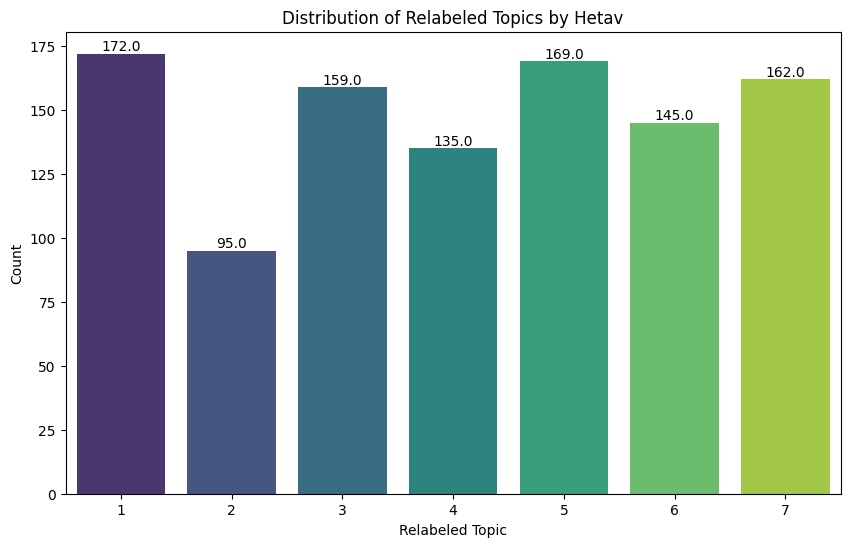

In [54]:
# draw a graph and show the distribution of the relabel column in the merged_relabeled dataframe with the number of counts.
plt.figure(figsize=(10,6))
sns.countplot(data=merged_relabeled, x='relabel', palette='viridis')
plt.title('Distribution of Relabeled Topics by Hetav')
plt.xlabel('Relabeled Topic')
plt.ylabel('Count')
# add counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
